#**Popularity Prediction**

**Introduction**

1. Being able to predict whether a song can be a hit has important applications in the music industry. Although it is true that the popularity of a song can be greatly affected by external factors such as social and commercial influences, to which degree audio features computed from musical signals can predict song popularity is an interesting research question on its own.[1]
2. Spotify rating for a song is one of the most important indicators for music industry. It doesn’t only offer high quality music, but also helps attract more audiences to musicians. it is very convenient to make rating and popularity prediction.
3. Using spotify dataset, I will try to analyze the song dataset and fit models to see whether a song's popularity predictable ?

##**Data Preprocessing**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('clean_df.csv')
df = data.copy()
unused_col = ['Unnamed: 0']
df = df.drop(columns=unused_col).reset_index(drop=True)
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

Dataset contains 232725 rows and 18 columns


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,1,0.1030,-13.879,0,0.0362,99.488,4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,6,0.2020,-21.150,1,0.0456,140.576,4,0.390


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
key,232725.0,6.224673,3.564725,1.00000,3.0000,6.000000,9.0000,12.000
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
mode,232725.0,0.652031,0.476327,0.00000,0.0000,1.000000,1.0000,1.000


In [4]:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

Text(0.5, 1.0, 'Popularity Based on Genre')

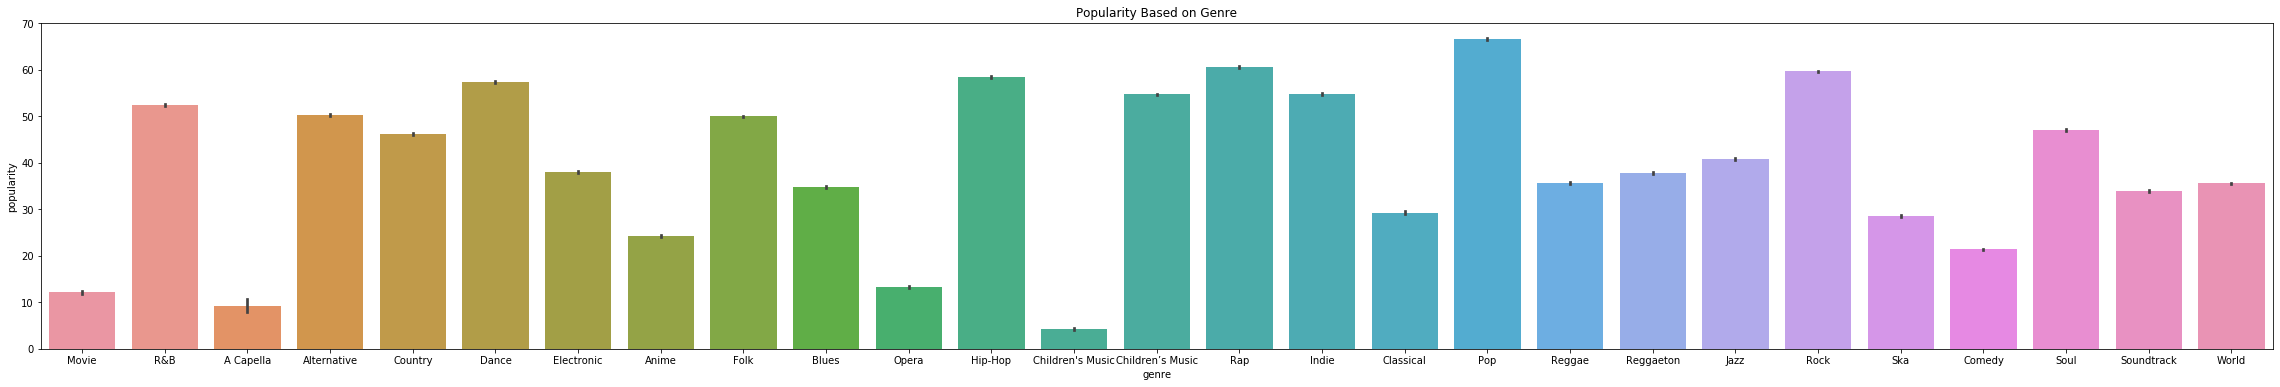

In [5]:
plt.subplots(figsize=(40, 6)) 
sns.barplot(x = 'genre', y = 'popularity', data = df)
plt.title('Popularity Based on Genre')

In [6]:
df['popularity'].value_counts()

0      6312
50     5415
53     5414
51     5401
52     5342
       ... 
96        8
94        7
99        4
98        3
100       2
Name: popularity, Length: 101, dtype: int64

Kita bikin 41 karena mean dari popularity adalah 41

In [7]:
#drop the data we don't use.
unused_col = ['genre', 'artist_name', 'track_id']
df = df.drop(columns=unused_col, axis=1)
df

,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,C'est beau de faire un Show,0,0.61100,0.389,99373,0.910,0.000000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,Perdu d'avance (par Gad Elmaleh),1,0.24600,0.590,137373,0.737,0.000000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,Don't Let Me Be Lonely Tonight,3,0.95200,0.663,170267,0.131,0.000000,1,0.1030,-13.879,0,0.0362,99.488,4,0.368
3,Dis-moi Monsieur Gordon Cooper,0,0.70300,0.240,152427,0.326,0.000000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,Ouverture,4,0.95000,0.331,82625,0.225,0.123000,6,0.2020,-21.150,1,0.0456,140.576,4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Son Of Slide,39,0.00384,0.687,326240,0.714,0.544000,3,0.0845,-10.626,1,0.0316,115.542,4,0.962
232721,Burning Fire,38,0.03290,0.785,282447,0.683,0.000880,5,0.2370,-6.944,0,0.0337,113.830,4,0.969
232722,(I'm Your) Hoochie Coochie Man,47,0.90100,0.517,166960,0.419,0.000000,3,0.0945,-8.282,1,0.1480,84.135,4,0.813
232723,With My Words,44,0.26200,0.745,222442,0.704,0.000000,10,0.3330,-7.137,1,0.1460,100.031,4,0.489


In [8]:
df["song_popularity"] = [ 1 if i>=41 else 0 for i in df.popularity ]
df["song_popularity"].value_counts()

1    127541
0    105184
Name: song_popularity, dtype: int64

In [9]:
#Top 10 songs and Ratings.
song_new = df.sort_values(by = "popularity", ascending = False).head(100)
melted = pd.melt(frame=song_new, id_vars = 'track_name', value_vars= ['popularity'])
melted2=melted.drop_duplicates(keep="first")
melted2

,track_name,variable,value
0,7 rings,popularity,100
2,Wow.,popularity,99
4,"break up with your girlfriend, i'm bored",popularity,99
6,Con Calma,popularity,98
9,Sweet but Psycho,popularity,97
10,Sunflower - Spider-Man: Into the Spider-Verse,popularity,97
11,Calma - Remix,popularity,97
12,Without Me,popularity,97
13,Happier,popularity,97
17,Dancing With A Stranger (with Normani),popularity,97


In [10]:
#drop the data we don't use.
df.drop(["track_name"],axis=1,inplace=True)
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_popularity
0,0,0.611,0.389,99373,0.910,0.000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814,0
1,1,0.246,0.590,137373,0.737,0.000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816,0
2,3,0.952,0.663,170267,0.131,0.000,1,0.1030,-13.879,0,0.0362,99.488,4,0.368,0
3,0,0.703,0.240,152427,0.326,0.000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227,0
4,4,0.950,0.331,82625,0.225,0.123,6,0.2020,-21.150,1,0.0456,140.576,4,0.390,0


In [0]:
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(11, 15)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          fmt = '.2f',
                          annot = True,
                          annot_kws = {'size': 12})#add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

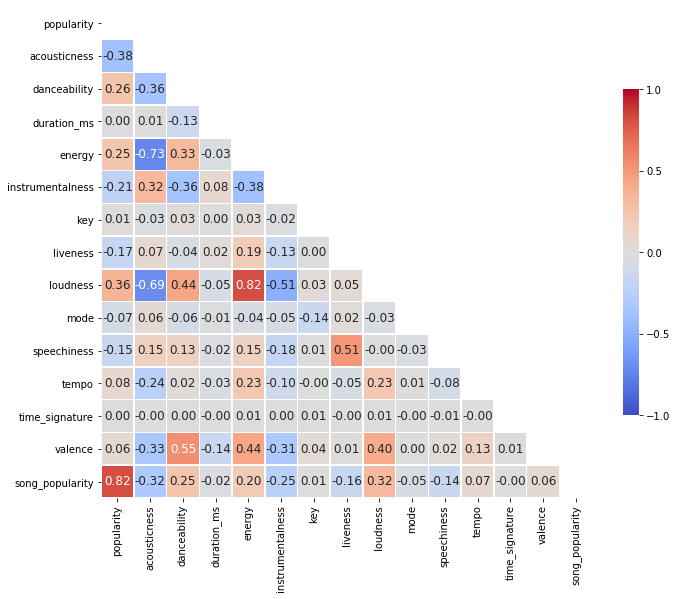

In [12]:
corr_heatmap(df)

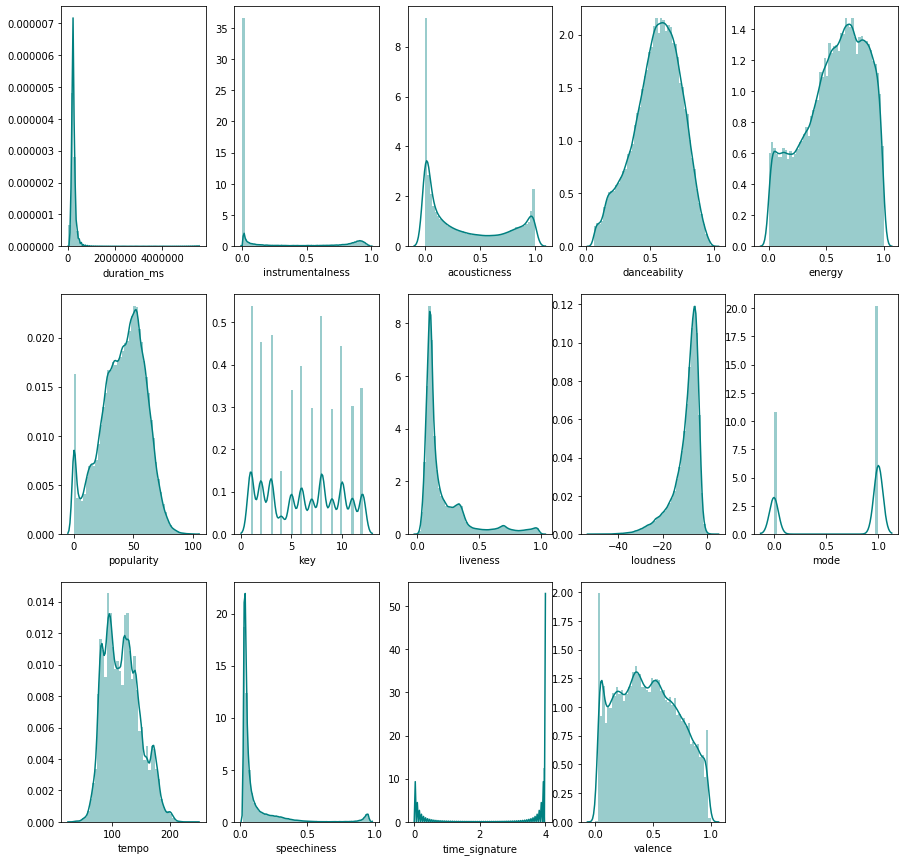

In [13]:
f, axes = plt.subplots(3, 5, figsize=(15, 15))
sns.distplot( df["duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( df["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( df["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( df["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( df["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( df["popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( df["key"] , color="teal", ax=axes[1, 1])
sns.distplot( df["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( df["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( df["mode"] , color="teal", ax=axes[1, 4])
sns.distplot( df["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( df["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( df["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( df["valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])


plt.show()

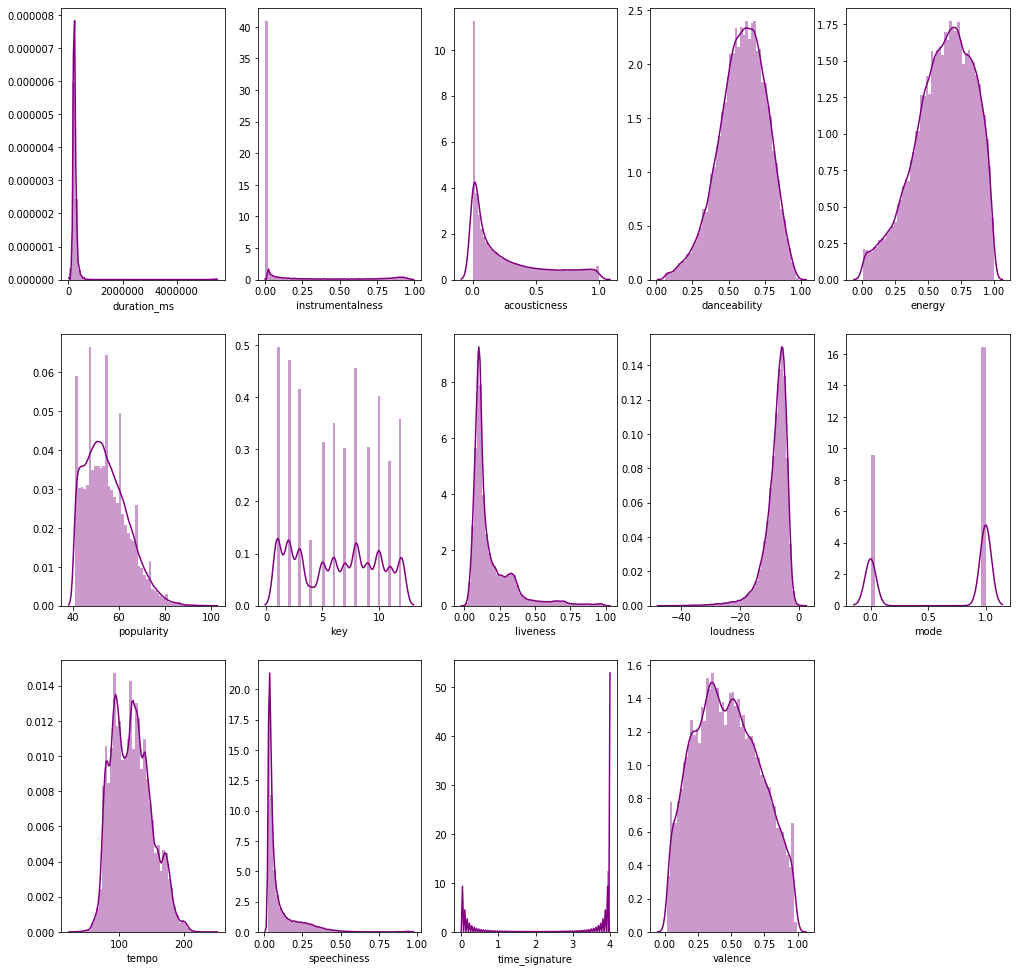

In [14]:
song_data1 = df[df.song_popularity == 1]
f, axes = plt.subplots(3, 5, figsize=(17, 17))
sns.distplot( song_data1["duration_ms"] , color="purple", ax=axes[0, 0])
sns.distplot( song_data1["instrumentalness"] , color="purple", ax=axes[0, 1])
sns.distplot( song_data1["acousticness"] , color="purple", ax=axes[0, 2])
sns.distplot( song_data1["danceability"] , color="purple", ax=axes[0, 3])
sns.distplot( song_data1["energy"] , color="purple", ax=axes[0, 4])
sns.distplot( song_data1["popularity"] , color="purple", ax=axes[1, 0])
sns.distplot( song_data1["key"] , color="purple", ax=axes[1, 1])
sns.distplot( song_data1["liveness"] , color="purple", ax=axes[1, 2])
sns.distplot( song_data1["loudness"] , color="purple", ax=axes[1, 3])
sns.distplot( song_data1["mode"] , color="purple", ax=axes[1, 4])
sns.distplot( song_data1["tempo"] , color="purple", ax=axes[2, 0])
sns.distplot( song_data1["speechiness"] , color="purple", ax=axes[2, 1])
sns.distplot( song_data1["time_signature"] , color="purple", ax=axes[2, 2])
sns.distplot( song_data1["valence"] , color="purple", ax=axes[2, 3])
f.delaxes(axes[2][4])

plt.show()

In [0]:
# sns.pairplot(df)
# plt.show()

In [16]:
#drop the data we don't use
df.drop(["popularity"],axis=1,inplace=True)
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_popularity
0,0.61100,0.389,99373,0.910,0.000000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814,0
1,0.24600,0.590,137373,0.737,0.000000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816,0
2,0.95200,0.663,170267,0.131,0.000000,1,0.1030,-13.879,0,0.0362,99.488,4,0.368,0
3,0.70300,0.240,152427,0.326,0.000000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227,0
4,0.95000,0.331,82625,0.225,0.123000,6,0.2020,-21.150,1,0.0456,140.576,4,0.390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,0.00384,0.687,326240,0.714,0.544000,3,0.0845,-10.626,1,0.0316,115.542,4,0.962,0
232721,0.03290,0.785,282447,0.683,0.000880,5,0.2370,-6.944,0,0.0337,113.830,4,0.969,0
232722,0.90100,0.517,166960,0.419,0.000000,3,0.0945,-8.282,1,0.1480,84.135,4,0.813,1
232723,0.26200,0.745,222442,0.704,0.000000,10,0.3330,-7.137,1,0.1460,100.031,4,0.489,1


In [17]:
#data preparation
x_data = df.drop(["song_popularity"], axis=1)
y = df["song_popularity"].values
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values#train test split
x

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.613454,0.356292,0.015167,0.910909,0.000000,0.090909,0.339614,0.900856,1.0,0.032070,0.642704,1.0,0.814
1,0.246988,0.571934,0.022029,0.737732,0.000000,0.545455,0.142710,0.834469,0.0,0.068374,0.675801,1.0,0.816
2,0.955823,0.650252,0.027969,0.131113,0.000000,0.000000,0.094241,0.686429,0.0,0.014818,0.325182,1.0,0.368
3,0.705823,0.196438,0.024747,0.326313,0.000000,0.090909,0.089697,0.716695,1.0,0.018311,0.665238,1.0,0.227
4,0.953815,0.294067,0.012142,0.225209,0.123123,0.454545,0.194208,0.557054,1.0,0.024767,0.518516,1.0,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,0.003855,0.676000,0.056136,0.714709,0.544545,0.181818,0.075561,0.744311,1.0,0.009949,0.400722,1.0,0.962
232721,0.033032,0.781139,0.048227,0.683677,0.000881,0.363636,0.229550,0.809825,0.0,0.012172,0.392666,1.0,0.969
232722,0.904618,0.493617,0.027372,0.419408,0.000000,0.181818,0.085658,0.786018,1.0,0.133150,0.252941,1.0,0.813
232723,0.263052,0.738226,0.037391,0.704699,0.000000,0.818182,0.326487,0.806391,1.0,0.131033,0.327737,1.0,0.489


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (186180, 13)
x_test:  (46545, 13)
y_train:  (186180,)
y_test:  (46545,)


#Logistic Regression

In [19]:
#GridSearchCV with Logreg
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))
##numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)

Tuned hyperparameters : {'C': 0.1, 'penalty': 'l2'}
Best Accuracy: 0.7010380136860075


In [20]:
## Sklearn with LR
logreg2 = LogisticRegression(C=0.001,penalty="l2")
logreg2.fit(x_train,y_train)
print("score: ", logreg2.score(x_test,y_test))

score:  0.6962387922885216


In [0]:
Logistic_score=logreg_cv.best_score_

In [22]:
print('Confusion Matrix : \n', confusion_matrix(y_test, logreg_cv.predict(x_test)))
print('Classification Report : \n', classification_report(y_test, logreg_cv.predict(x_test)))

Confusion Matrix : 
 [[17114 14278]
 [ 6503 31923]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.55      0.62     31392
           1       0.69      0.83      0.75     38426

    accuracy                           0.70     69818
   macro avg       0.71      0.69      0.69     69818
weighted avg       0.71      0.70      0.69     69818



In [23]:
# KNN prediction
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = df.loc[:,df.columns != 'song_popularity'], df.loc[:,'song_popularity']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [0 1 1 ... 1 1 1]


In [24]:
#KNN Test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = df.loc[:,df.columns != 'song_popularity'], df.loc[:,'song_popularity']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.7108604576216565


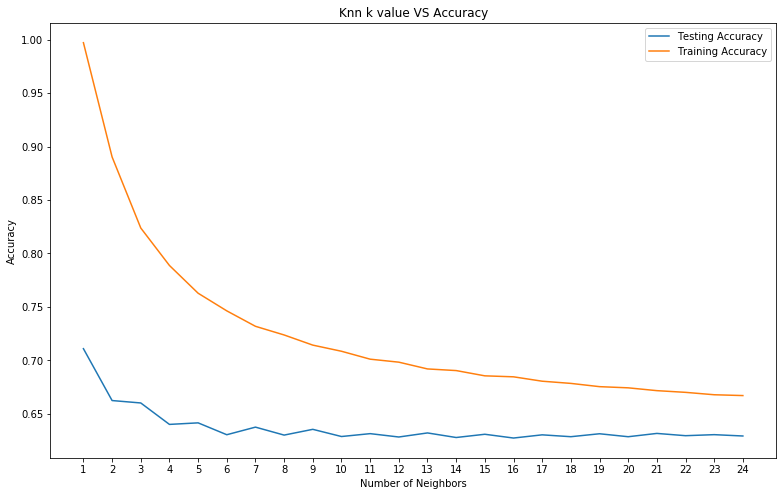

Best accuracy is 0.7108604576216565 with K = 1


In [25]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [0]:
KKN_Score= max(test_accuracy)

In [27]:
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) 
knn_cv.fit(x,y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best accuracy: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 1}
Best accuracy: 0.6961091416908368


In [28]:
print('Confusion Matrix : \n', confusion_matrix(y_test, knn_cv.predict(x_test)))
print('Classification Report : \n', classification_report(y_test, knn_cv.predict(x_test)))

Confusion Matrix : 
 [[21003    86]
 [   69 25387]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21089
           1       1.00      1.00      1.00     25456

    accuracy                           1.00     46545
   macro avg       1.00      1.00      1.00     46545
weighted avg       1.00      1.00      1.00     46545



In [29]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
DecisionTree_score=dt.score(x_test,y_test)
print("Accuracy of decision tree:",dt.score(x_test,y_test))

Accuracy of decision tree: 0.75148780749812


In [30]:
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report : \n', classification_report(y_test, y_pred))

Confusion Matrix : 
 [[14387  6702]
 [ 4865 20591]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71     21089
           1       0.75      0.81      0.78     25456

    accuracy                           0.75     46545
   macro avg       0.75      0.75      0.75     46545
weighted avg       0.75      0.75      0.75     46545



In [31]:
rf=RandomForestClassifier(n_estimators=100,random_state = 4)
rf.fit(x_train,y_train)
print("Accuracy of random forest",rf.score(x_test,y_test))
y_pred=rf.predict(x_test)
t_true=y_test

Accuracy of random forest 0.7944999462885379


In [0]:
RandomForestClassifier_score=rf.score(x_test,y_test)

In [0]:
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

In [34]:
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[15072  6017]
 [ 3548 21908]]
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.71      0.76     21089
           1       0.78      0.86      0.82     25456

    accuracy                           0.79     46545
   macro avg       0.80      0.79      0.79     46545
weighted avg       0.80      0.79      0.79     46545



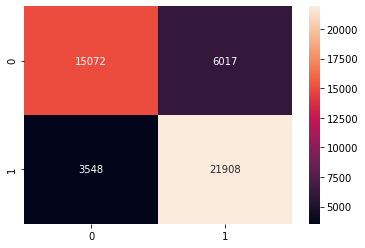

In [35]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [36]:
model_performances=pd.DataFrame({'Model':['LogisticRegession','K-NearestNeighbors', 'DesicionTreeClassifier', 'RandomForestClassifier'],
                                 'Accuracy':[Logistic_score, KKN_Score, DecisionTree_score, RandomForestClassifier_score]})
model_performances.sort_values(by = "Accuracy")

,Model,Accuracy
0,LogisticRegession,0.701038
1,K-NearestNeighbors,0.710860
2,DesicionTreeClassifier,0.751488
3,RandomForestClassifier,0.794500


In [37]:
df['result'] = rf.predict(df.drop(columns=['song_popularity']))
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_popularity,result
0,0.611,0.389,99373,0.910,0.000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814,0,0
1,0.246,0.590,137373,0.737,0.000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816,0,0
2,0.952,0.663,170267,0.131,0.000,1,0.1030,-13.879,0,0.0362,99.488,4,0.368,0,0
3,0.703,0.240,152427,0.326,0.000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227,0,0
4,0.950,0.331,82625,0.225,0.123,6,0.2020,-21.150,1,0.0456,140.576,4,0.390,0,0


In [40]:
data['result'] = df['result']
data.head()

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,result
0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814,0
1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816,0
2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,1,0.1030,-13.879,0,0.0362,99.488,4,0.368,0
3,3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227,0
4,4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,6,0.2020,-21.150,1,0.0456,140.576,4,0.390,0


In [0]:
data.to_csv('final_data.csv')